In [20]:
#Імпорт необхідних бібліотек
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as ppl
import tensorflow as tf

from sklearn.model_selection import train_test_split as tts
from tensorflow import keras as ks
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential as sql
from tensorflow.keras.layers import Dense as dn
from tensorflow.keras.layers import Dropout as dpt

In [21]:
#Завдання 2
tens_scal = tf.constant(3)
tens_vect = tf.Variable([3, 13, 23, 33])
tens_mat1 = tf.constant([[13, 33],[33, 23]])
arr_matr2 = nmp.arange(12, 20, step=2 , dtype=nmp.int32)
tens_mat2 = tf.constant(arr_matr2, shape=(2, 2))
tens_tens = tf.constant([[[13, 23, 33], [43, 53, 63]], [[73, 83, 93], [33, 63, 93]]])
#Вивід тензорів
print("\nScalar:\n ", tens_scal)
print("\nVector:\n ", tens_vect)
print("\nMatrix 1:\n ", tens_mat1)
print("\nMatrix 2:\n ", tens_mat2)
print("\nTensor:\n ", tens_tens)
#Вивід операцій
print("\nSum:\n ", tf.add(tens_mat1, tens_mat2))
print("\nDifference:\n ", tf.subtract(tens_mat1, tens_mat2))
print("\nMultiplication:\n ", tf.multiply(tens_mat1, tens_mat2))
print("\nDivision:\n ", tf.divide(tens_mat1, tens_mat2))
print("\nMatrix multiplication:\n ", tf.matmul(tens_mat1, tens_mat2))
print("\nSum of all elements:\n ", tf.reduce_sum(tens_tens))
print("\nMaximum:\n ", tf.reduce_max(tens_tens))
print("\nMinimum:\n ", tf.reduce_min(tens_tens))
print("\nValue of (1;2) element:\n ", tens_tens[0, 1])
print("\nValues of (n:2) elements:\n ", tens_tens[:, 1])


Scalar:
  tf.Tensor(3, shape=(), dtype=int32)

Vector:
  <tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([ 3, 13, 23, 33])>

Matrix 1:
  tf.Tensor(
[[13 33]
 [33 23]], shape=(2, 2), dtype=int32)

Matrix 2:
  tf.Tensor(
[[12 14]
 [16 18]], shape=(2, 2), dtype=int32)

Tensor:
  tf.Tensor(
[[[13 23 33]
  [43 53 63]]

 [[73 83 93]
  [33 63 93]]], shape=(2, 2, 3), dtype=int32)

Sum:
  tf.Tensor(
[[25 47]
 [49 41]], shape=(2, 2), dtype=int32)

Difference:
  tf.Tensor(
[[ 1 19]
 [17  5]], shape=(2, 2), dtype=int32)

Multiplication:
  tf.Tensor(
[[156 462]
 [528 414]], shape=(2, 2), dtype=int32)

Division:
  tf.Tensor(
[[1.08333333 2.35714286]
 [2.0625     1.27777778]], shape=(2, 2), dtype=float64)

Matrix multiplication:
  tf.Tensor(
[[684 776]
 [764 876]], shape=(2, 2), dtype=int32)

Sum of all elements:
  tf.Tensor(666, shape=(), dtype=int32)

Maximum:
  tf.Tensor(93, shape=(), dtype=int32)

Minimum:
  tf.Tensor(13, shape=(), dtype=int32)

Value of (1;2) element:
  tf.Tensor(

Loss on training data:
 [163.4093475341797, 163.4093475341797]
Loss on test data:
 [164.4886474609375, 164.4886474609375]


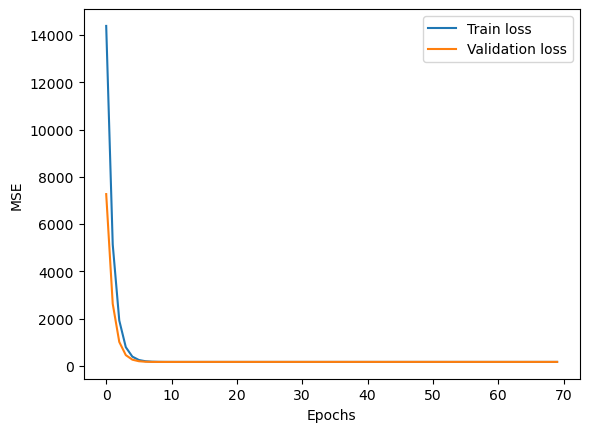

In [22]:
#Завдання 3
dat = pnd.read_csv('Lab2_Part1_Data.csv')
x = dat.drop('Target', axis=1)
y = dat['Target']
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=13)
md = sql([dn(1, input_shape=(x.shape[1],))])
md.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])
h = md.fit(xtrain, ytrain, epochs=70, validation_data=(xtest, ytest), verbose=0)
#Оцінка моделі 
print("Loss on training data:\n", md.evaluate(xtrain, ytrain, verbose=0))
print("Loss on test data:\n", md.evaluate(xtest, ytest, verbose=0))
#Візуалізація
ppl.plot(h.history['loss'], label='Train loss')
ppl.plot(h.history['val_loss'], label='Validation loss')
ppl.xlabel('Epochs')
ppl.ylabel('MSE')
ppl.legend()
ppl.show(close=None, block=None)

Loss on training data:
 [0.3447078764438629, 0.8500000238418579]
Loss on test data:
 [0.2926836311817169, 0.8899999856948853]


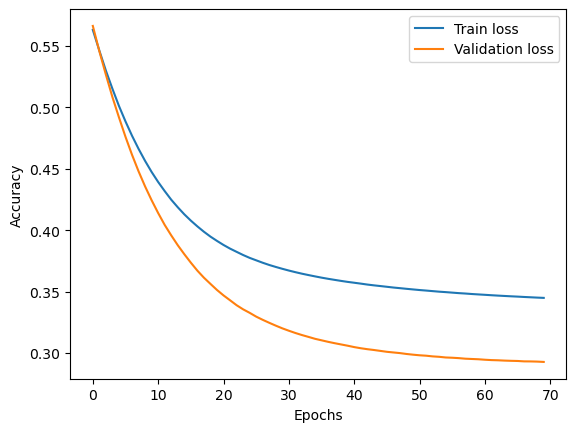

In [23]:
#Завдання 4
data = pnd.read_csv('Lab3_Part1_Data.csv')
x = data.drop('Target', axis=1)
y = data['Target']
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=13)
mdl = sql([dn(1, input_shape=(x.shape[1],), activation='sigmoid')])
mdl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h = mdl.fit(xtrain, ytrain, epochs=70, validation_data=(xtest, ytest), verbose=0)
#Оцінка моделі 
print("Loss on training data:\n", mdl.evaluate(xtrain, ytrain, verbose=0))
print("Loss on test data:\n", mdl.evaluate(xtest, ytest, verbose=0))
#Візуалізація
ppl.plot(h.history['loss'], label='Train loss')
ppl.plot(h.history['val_loss'], label='Validation loss')
ppl.xlabel('Epochs')
ppl.ylabel('Accuracy')
ppl.legend()
ppl.show(close=None, block=None)